<div style='text-align: center; padding: 30px'>
  <h1><strong>Encuesta Nacional de Salud y Nutrición 2023</strong></h1>
  <h3><strong>Nuria y Heri</strong></h1>
</div>

[Encuesta Nacional de Salud y Nutrición Continua 2023](https://ensanut.insp.mx/encuestas/ensanutcontinua2023/index.php)

Objetivo: Realizar un entendimiento de los datos de la Encuesta Nacional de Salud y Nutrición 2023.

Usando la base de datos y el catálogo del ENSANUT 2023, realiza las siguientes actividades en Python:

1. Selecciona un cuestionario del hogar y un cuestionario de salud del ENSANUT 2023.
2. Importa cada base de datos correspondiente a cada cuestionario como dataframes de pandas.
3. Integra ambas bases de datos utilizando las variables de FOLIO como clave.
4. Elimina de tu base de datos las columnas que todos sus registros sean valores nulos.
5. Crea las siguientes funciones, cuyos parámetros sean: un dataframe, el nombre de una o 2 columnas.  
    - Una función que genere un boxplot de una variable numérica  
    - Una función que genere el histograma de una variable numérica  
    - Una función que genere la gráfica de barras de una variable categórica  
    - Una función que genere un heatmap de la matriz de correlación de un subconjunto de variables numéricas.  
    - Una función que genere un gráfico de dispersión entre dos variables numéricas.
6. Elige un tema y crea un ejemplo de cada gráfica.
7. Escribe un reporte de 2 a 4 cuartillas. Explicando conclusiones, hipótesis o hallazgos obtenidos a partir de las gráficas creadas.

Asegurarse que las gráficas de ejemplo muestren datos consistentes (eliminando valores nulos, no contestó, etc).

Las primeras tres gráficas deben tener como título el nombre de la variable que aparece en el catálogo. Para ello necesitaras importar en Python los catalogos de los cuestionarios elegidos, y construir una función que busque el nombre de etiqueta de la variable y devuelva el título de la pregunta del cuestionario correspondiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hogar = pd.read_csv('hogar_ensanut2023_w_n.csv', encoding='latin1', sep=';')    #  latín1 es el encoding para español
hogar 

,ï»¿FOLIO_I,cuenta,maquina,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,tiempo1,resultado_1,hora_ini_2,...,tiempo,hora_fin,fecha_fin,completa,otroent,upm,x_region,ponde_f,estrato,est_sel
0,2023_01001001,167,MQ448,15:31:34,21/11/2023,16:00:18,21/11/2023,29,1,,...,29,16:00:18,21/11/2023,1,,0100100013312,1,"20577,7335256069",3,1000
1,2023_01001002,194,MQ453,12:39:04,22/11/2023,13:15:36,22/11/2023,36,1,,...,36,13:15:36,22/11/2023,1,,0100100013312,1,"20577,7335256069",3,1000
2,2023_01001003,169,MQ448,09:06:24,22/11/2023,09:49:22,22/11/2023,43,1,,...,43,09:49:22,22/11/2023,1,,0100100013312,1,"20577,7335256069",3,1000
3,2023_01001006,170,MQ448,16:06:12,22/11/2023,16:22:25,22/11/2023,16,1,,...,16,16:22:25,22/11/2023,1,,0100100013312,1,"20577,7335256069",3,1000
4,2023_01001008,141,MQ454,18:25:24,21/11/2023,18:59:16,21/11/2023,34,1,,...,34,18:59:16,21/11/2023,1,,0100100013312,1,"19237,7880867301",3,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5960,2023_32024026,170,MQ355,15:36:46,22/11/2023,15:49:17,22/11/2023,13,1,,...,13,15:49:17,22/11/2023,1,,3202400010322,1,"20643,0189033339",2,32000
5961,2023_32024027,165,MQ461,14:46:42,22/11/2023,17:44:22,22/11/2023,178,1,,...,178,17:44:22,22/11/2023,1,,3202400010322,1,"13743,2120385584",2,32000
5962,2023_32024028,217,MQ458,10:08:34,23/11/2023,10:31:57,23/11/2023,23,1,,...,23,10:31:57,23/11/2023,1,,3202400010322,1,"13743,2120385584",2,32000
5963,2023_32024030,152,MQ459,18:48:20,22/11/2023,19:06:55,22/11/2023,18,1,,...,18,19:06:55,22/11/2023,1,,3202400010322,1,"13743,2120385584",2,32000


In [3]:
adultos = pd.read_csv('adultos_ensanut2023_w_n.csv', encoding='latin1', sep=';')    # sep=';' es para que lea el archivo csv, porque por default es ','
adultos

,ï»¿FOLIO_INT,FOLIO_I,maquina,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,tiempo1,resultado_1,hora_ini_2,...,tiempo,hora_fin,fecha_fin,completa,otroent,ponde_f,estrato,est_sel,upm,x_region
0,2023_01001001_02,2023_01001001,MQ448,16:02:19,21/11/2023,16:17:03,21/11/2023,15,1,,...,15,16:17:03,21/11/2023,1,,"66707,2008552126",3,1000,0100100013312,1
1,2023_01001002_01,2023_01001002,MQ453,13:15:44,22/11/2023,13:29:50,22/11/2023,14,1,,...,14,13:29:50,22/11/2023,1,,"33353,6004276063",3,1000,0100100013312,1
2,2023_01001003_01,2023_01001003,MQ447,13:25:42,22/11/2023,13:45:40,22/11/2023,20,1,,...,20,13:45:40,22/11/2023,1,,"22056,4113369677",3,1000,0100100013312,1
3,2023_01001003_04,2023_01001003,MQ448,10:00:58,22/11/2023,10:18:03,22/11/2023,18,1,,...,18,10:18:03,22/11/2023,1,,"100060,801282819",3,1000,0100100013312,1
4,2023_01001008_03,2023_01001008,MQ454,18:59:24,21/11/2023,19:13:54,21/11/2023,14,1,,...,14,19:13:54,21/11/2023,1,,"93545,2142225422",3,1000,0100100013312,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,2023_32024026_02,2023_32024026,MQ355,15:49:28,22/11/2023,15:55:52,22/11/2023,6,1,,...,6,15:55:52,22/11/2023,1,,"51098,9491872665",2,32000,3202400010322,1
6768,2023_32024027_01,2023_32024027,MQ461,17:44:29,22/11/2023,17:50:58,22/11/2023,6,1,,...,6,17:50:58,22/11/2023,1,,"17459,7817992026",2,32000,3202400010322,1
6769,2023_32024027_02,2023_32024027,MQ461,17:51:00,22/11/2023,17:55:27,22/11/2023,4,1,,...,4,17:55:27,22/11/2023,1,,"20233,5662491552",2,32000,3202400010322,1
6770,2023_32024030_01,2023_32024030,MQ459,19:07:03,22/11/2023,19:18:15,22/11/2023,11,1,,...,11,19:18:15,22/11/2023,1,,"20233,5662491552",2,32000,3202400010322,1


In [4]:
hogar.rename(columns={'ï»¿FOLIO_I': 'FOLIO_I'}, inplace=True)   #  renombrar la columna 'ï»¿FOLIO_I' a 'FOLIO_I'
hogar.columns

Index(['FOLIO_I', 'cuenta', 'maquina', 'hora_ini_1', 'fecha_ini_1',
       'hora_fin_1', 'fecha_fin_1', 'tiempo1', 'resultado_1', 'hora_ini_2',
       ...
       'tiempo', 'hora_fin', 'fecha_fin', 'completa', 'otroent', 'upm',
       'x_region', 'ponde_f', 'estrato', 'est_sel'],
      dtype='object', length=191)

In [5]:
hogar.rename(columns={'FOLIO_INT': 'FOLIO_I'}, inplace=True)    #  renombrar la columna 'FOLIO_INT' a 'FOLIO_I'
adultos.columns

Index(['ï»¿FOLIO_INT', 'FOLIO_I', 'maquina', 'hora_ini_1', 'fecha_ini_1',
       'hora_fin_1', 'fecha_fin_1', 'tiempo1', 'resultado_1', 'hora_ini_2',
       ...
       'tiempo', 'hora_fin', 'fecha_fin', 'completa', 'otroent', 'ponde_f',
       'estrato', 'est_sel', 'upm', 'x_region'],
      dtype='object', length=758)

In [6]:
merge = pd.merge(hogar, adultos, how='inner', on='FOLIO_I')     #  unir los dos dataframes por la columna 'FOLIO_I'
merge = pd.merge(hogar, adultos, how='inner', on='FOLIO_I', suffixes=('', '_dup'))  #  unir los dos dataframes por la columna 'FOLIO_I' y agregar sufijos a las columnas duplicadas
merge = merge.loc[:, ~merge.columns.str.endswith('_dup')]   #  eliminar las columnas duplicadas
merge

,FOLIO_I,cuenta,maquina,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,tiempo1,resultado_1,hora_ini_2,...,a1804a,a1805,a1806,a1806e,a1807,nota047,a1901,a1902,a1903,a1904
0,2023_01001001,167,MQ448,15:31:34,21/11/2023,16:00:18,21/11/2023,29,1,,...,,,,,,,,,,
1,2023_01001002,194,MQ453,12:39:04,22/11/2023,13:15:36,22/11/2023,36,1,,...,,,,,,,,,,
2,2023_01001003,169,MQ448,09:06:24,22/11/2023,09:49:22,22/11/2023,43,1,,...,,,,,,,,,,
3,2023_01001003,169,MQ448,09:06:24,22/11/2023,09:49:22,22/11/2023,43,1,,...,,,,,,,,,,
4,2023_01001008,141,MQ454,18:25:24,21/11/2023,18:59:16,21/11/2023,34,1,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,2023_32024026,170,MQ355,15:36:46,22/11/2023,15:49:17,22/11/2023,13,1,,...,,,,,,,,,,
6768,2023_32024027,165,MQ461,14:46:42,22/11/2023,17:44:22,22/11/2023,178,1,,...,,,,,,,,,,
6769,2023_32024027,165,MQ461,14:46:42,22/11/2023,17:44:22,22/11/2023,178,1,,...,,,,,,,,,,
6770,2023_32024030,152,MQ459,18:48:20,22/11/2023,19:06:55,22/11/2023,18,1,,...,,,,,,,,,,


In [7]:
empty = [column for column in merge.columns if merge[column].isnull().all()]    #  encontrar columnas vacías
mergefull = merge.drop(columns=empty)   #  eliminar columnas vacías
mergefull

,FOLIO_I,cuenta,maquina,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,tiempo1,resultado_1,hora_ini_2,...,a1804a,a1805,a1806,a1806e,a1807,nota047,a1901,a1902,a1903,a1904
0,2023_01001001,167,MQ448,15:31:34,21/11/2023,16:00:18,21/11/2023,29,1,,...,,,,,,,,,,
1,2023_01001002,194,MQ453,12:39:04,22/11/2023,13:15:36,22/11/2023,36,1,,...,,,,,,,,,,
2,2023_01001003,169,MQ448,09:06:24,22/11/2023,09:49:22,22/11/2023,43,1,,...,,,,,,,,,,
3,2023_01001003,169,MQ448,09:06:24,22/11/2023,09:49:22,22/11/2023,43,1,,...,,,,,,,,,,
4,2023_01001008,141,MQ454,18:25:24,21/11/2023,18:59:16,21/11/2023,34,1,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,2023_32024026,170,MQ355,15:36:46,22/11/2023,15:49:17,22/11/2023,13,1,,...,,,,,,,,,,
6768,2023_32024027,165,MQ461,14:46:42,22/11/2023,17:44:22,22/11/2023,178,1,,...,,,,,,,,,,
6769,2023_32024027,165,MQ461,14:46:42,22/11/2023,17:44:22,22/11/2023,178,1,,...,,,,,,,,,,
6770,2023_32024030,152,MQ459,18:48:20,22/11/2023,19:06:55,22/11/2023,18,1,,...,,,,,,,,,,


In [8]:
catad = pd.read_excel('adultos_ensanut2023_w_n.Catlogo.xlsx', skiprows=16)  # skiprows=16 es para que no lea las primeras 16 filas
catad

,Variable,Posición,Etiqueta,Nivel de medición,Ancho de columna,Alineación
0,FOLIO_INT,1.0,Folio de integrante,Nominal,20.0,Izquierda
1,FOLIO_I,2.0,Folio,Nominal,17.0,Izquierda
2,maquina,3.0,Maquina,Nominal,10.0,Izquierda
3,hora_ini_1,4.0,Hora de Inicio 1,Nominal,10.0,Izquierda
4,fecha_ini_1,5.0,Fecha de Inicio 1,Nominal,10.0,Izquierda
...,...,...,...,...,...,...
754,estrato,755.0,Estrato urbanidad/ruralidad,Nominal,10.0,Derecha
755,est_sel,756.0,Estrato de seleccion,Escala,10.0,Derecha
756,upm,757.0,Unidad Primaria de Muestreo,Nominal,16.0,Izquierda
757,x_region,758.0,Region sugerida para el analisis,Nominal,10.0,Derecha


In [9]:
catho = pd.read_excel('hogar_ensanut2023_w_n.Catlogo.xlsx', skiprows=16)  
catho

,Variable,Posición,Etiqueta,Nivel de medición,Ancho de columna
0,FOLIO_I,1.0,Folio,Nominal,17.0
1,cuenta,2.0,CUENTA,Escala,8.0
2,maquina,3.0,MAQUINA,Nominal,10.0
3,hora_ini_1,4.0,Hora de Inicio 1,Nominal,10.0
4,fecha_ini_1,5.0,Fecha de Inicio 1,Nominal,10.0
...,...,...,...,...,...
187,x_region,188.0,Region sugerida para el análisis,Nominal,10.0
188,ponde_f,189.0,ponderador de hogar,Escala,10.0
189,estrato,190.0,Estrato urbanidad/ruralidad,Nominal,10.0
190,est_sel,191.0,Estrato de seleccion,Escala,10.0


In [10]:
cat = pd.concat([catad, catho], ignore_index=True)  #  concatenar los dos dataframes
cat

,Variable,Posición,Etiqueta,Nivel de medición,Ancho de columna,Alineación
0,FOLIO_INT,1.0,Folio de integrante,Nominal,20.0,Izquierda
1,FOLIO_I,2.0,Folio,Nominal,17.0,Izquierda
2,maquina,3.0,Maquina,Nominal,10.0,Izquierda
3,hora_ini_1,4.0,Hora de Inicio 1,Nominal,10.0,Izquierda
4,fecha_ini_1,5.0,Fecha de Inicio 1,Nominal,10.0,Izquierda
...,...,...,...,...,...,...
946,x_region,188.0,Region sugerida para el análisis,Nominal,10.0,NaN
947,ponde_f,189.0,ponderador de hogar,Escala,10.0,NaN
948,estrato,190.0,Estrato urbanidad/ruralidad,Nominal,10.0,NaN
949,est_sel,191.0,Estrato de seleccion,Escala,10.0,NaN


In [11]:
dictcat = dict(zip(cat['Variable'], cat['Etiqueta']))   #  crear un diccionario con las variables y etiquetas 
dictcat

{'FOLIO_INT': 'Folio de integrante',
 'FOLIO_I': 'Folio',
 'maquina': 'MAQUINA',
 'hora_ini_1': 'Hora de Inicio 1',
 'fecha_ini_1': 'Fecha de Inicio 1',
 'hora_fin_1': 'Hora termino 1',
 'fecha_fin_1': 'Fecha termino 1',
 'tiempo1': 'Duración de la Entrevista 1',
 'resultado_1': 'Resultado de entrevista 1',
 'hora_ini_2': 'Hora de Inicio 2',
 'fecha_ini_2': 'Fecha de Inicio 2',
 'hora_fin_2': 'Hora de Termino 2',
 'fecha_fin_2': 'Fecha de Termino 2',
 'tiempo2': 'Duración de la Entrevista 2',
 'resultado_2': 'Resultado de entrevista 2',
 'hora_ini_3': 'Hora de Inicio 3',
 'fecha_ini_3': 'Fecha de Inicio 3',
 'hora_fin_3': 'Hora de Termino 3',
 'fecha_fin_3': 'Fecha de Termino 3',
 'tiempo3': 'Duración de la Entrevista 3',
 'resultado_3': 'Resultado de entrevista 3',
 'hora_ini_4': 'Hora de Inicio 4',
 'fecha_ini_4': 'Fecha de Inicio 4',
 'hora_fin_4': 'Hora de Termino 4',
 'fecha_fin_4': 'Fecha de Termino 4',
 'tiempo4': 'Duración de la Entrevista 4',
 'resultado_4': 'Resultado de entr

### Etiquetas para los histogramas

In [12]:
etiquetas_adultos = pd.read_excel('adultos_ensanut2023_w_n.Catlogo.xlsx', sheet_name=1, skiprows=16)  # skiprows=16 es para que no lea las primeras 16 filas
etiquetas_adultos.head(13)

,Valor,Unnamed: 1,Etiqueta
0,sexo,1,Hombre
1,NaN,2,Mujer
2,asexo,1,Hombre
3,NaN,2,Mujer
4,nota014,1,Favor de continuar
5,a0107,1,Ganó peso.
6,NaN,2,Perdió peso.
7,NaN,3,No ha experimentado cambios en su Peso.
8,NaN,4,Ganó o perdió peso porque está embarazada.
9,NaN,9,No sabe.


In [13]:
etiquetas_adultos = etiquetas_adultos.ffill()   #  rellenar los valores faltantes
etiquetas_adultos

,Valor,Unnamed: 1,Etiqueta
0,sexo,1,Hombre
1,sexo,2,Mujer
2,asexo,1,Hombre
3,asexo,2,Mujer
4,nota014,1,Favor de continuar
...,...,...,...
3161,x_region,"1,00",Norte
3162,x_region,"2,00",Centro
3163,x_region,"3,00",Sur
3164,x_region,"11,00",Guanajuato


In [14]:
# Convertir la segunda columna en nombres 
diccionario_adultos = {}

for _, row in etiquetas_adultos.iterrows():
    valor = row['Valor']  # Nombre de la variable principal
    sub_valor = row[etiquetas_adultos.columns[1]]  # Numero de la segunda columna
    etiqueta = row[etiquetas_adultos.columns[2]]  # Etiqueta
    
    if valor not in diccionario_adultos:
        diccionario_adultos[valor] = {} #   crear un diccionario vacío
    
    diccionario_adultos[valor][sub_valor] = etiqueta    #  agregar la etiqueta al diccionario

In [15]:
print(diccionario_adultos)

{'sexo': {'1': 'Hombre', '2': 'Mujer'}, 'asexo': {'1': 'Hombre', '2': 'Mujer'}, 'nota014': {'1': 'Favor de continuar'}, 'a0107': {'1': 'Ganó peso.', '2': 'Perdió peso.', '3': 'No ha experimentado cambios en su Peso.', '4': 'Ganó o perdió peso porque está embarazada.', '9': 'No sabe.'}, 'a0109': {'1': 'SI.', '2': 'NO.'}, 'A0110A': {'1': 'disminuir el tamaño de las porciones?', '2': 'aumentar la actividad física?', '3': 'seguir las recomendaciones de un profesional de la salud?', '4': 'tomar medicamentos para perder peso?', '5': 'eliminar el consumo de refrescos?', '6': 'aumentar el consumo de vegetales y alimentos ricos en fibra', '7': 'realizar algún tipo de ejercicio?', '8': 'tomar mucha agua?', '9': 'Otra forma (especifica).'}, 'A0110B': {'1': 'disminuir el tamaño de las porciones?', '2': 'aumentar la actividad física?', '3': 'seguir las recomendaciones de un profesional de la salud?', '4': 'tomar medicamentos para perder peso?', '5': 'eliminar el consumo de refrescos?', '6': 'aument

In [16]:
etiquetas_hogar = pd.read_excel('hogar_ensanut2023_w_n.Catlogo.xlsx', sheet_name=1, skiprows=16)  # skiprows=16 es para que no lea las primeras 16 filas
etiquetas_hogar.head(13)

,Valor,Unnamed: 1,Etiqueta
0,nota1,1,"¿Acepta usted? ,,,, Sí"
1,NaN,2,"¿Acepta usted? ,,,, No"
2,nota1a,1,Favor de Continuar
3,h0101,1,Material de desecho
4,NaN,2,Lámina de cartón
5,NaN,3,Lámina metálica
6,NaN,4,Lámina de asbesto
7,NaN,5,Palma o paja
8,NaN,6,Madera o tejamanil
9,NaN,7,Terrado con viguería


In [17]:
etiquetas_hogar.iloc[:, 0] = etiquetas_hogar.iloc[:, 0].ffill()   #  rellenar los valores vacíos con el valor anterior
etiquetas_hogar

,Valor,Unnamed: 1,Etiqueta
0,nota1,1,"¿Acepta usted? ,,,, Sí"
1,nota1,2,"¿Acepta usted? ,,,, No"
2,nota1a,1,Favor de Continuar
3,h0101,1,Material de desecho
4,h0101,2,Lámina de cartón
...,...,...,...
521,x_region,"11,00",Guanajuato
522,x_region,"25,00",Sinaloa
523,estrato,"1,00",Rural ( <2500 Hab )
524,estrato,"2,00","Urbano ( 2500-99,999 Hab)"


In [18]:
# Convertir la segunda columna en nombres 
diccionario_hogares = {}

for _, row in etiquetas_hogar.iterrows():
    valor = row['Valor']  # Nombre de la variable principal
    sub_valor = row[etiquetas_hogar.columns[1]]  # Numero de la segunda columna
    etiqueta = row[etiquetas_hogar.columns[2]]  # Etiqueta
    
    if valor not in diccionario_hogares:
        diccionario_hogares[valor] = {}  #  crear un diccionario vacío
    
    diccionario_hogares[valor][sub_valor] = etiqueta    #  agregar la etiqueta al diccionario

In [19]:
# Combinar los dos diccionarios
diccionario_etiquetas = {**diccionario_adultos, **diccionario_hogares}

In [20]:
print(diccionario_etiquetas)

{'sexo': {'1': 'Hombre', '2': 'Mujer'}, 'asexo': {'1': 'Hombre', '2': 'Mujer'}, 'nota014': {'1': 'Favor de continuar'}, 'a0107': {'1': 'Ganó peso.', '2': 'Perdió peso.', '3': 'No ha experimentado cambios en su Peso.', '4': 'Ganó o perdió peso porque está embarazada.', '9': 'No sabe.'}, 'a0109': {'1': 'SI.', '2': 'NO.'}, 'A0110A': {'1': 'disminuir el tamaño de las porciones?', '2': 'aumentar la actividad física?', '3': 'seguir las recomendaciones de un profesional de la salud?', '4': 'tomar medicamentos para perder peso?', '5': 'eliminar el consumo de refrescos?', '6': 'aumentar el consumo de vegetales y alimentos ricos en fibra', '7': 'realizar algún tipo de ejercicio?', '8': 'tomar mucha agua?', '9': 'Otra forma (especifica).'}, 'A0110B': {'1': 'disminuir el tamaño de las porciones?', '2': 'aumentar la actividad física?', '3': 'seguir las recomendaciones de un profesional de la salud?', '4': 'tomar medicamentos para perder peso?', '5': 'eliminar el consumo de refrescos?', '6': 'aument

## **Plots**

In [21]:
palette = sns.color_palette('muted')
palette

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [22]:
def box_plot(column):
    sns.set_style('whitegrid')  # estilo de la grafica
    plt.figure(figsize=(3, 6))
    ax = sns.boxplot(y=mergefull[column], color=palette[0], width=0.6, linewidth=1.5)
    plt.title(dictcat[column] + '\n', fontsize=16, fontweight='bold')
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Valores', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # cuadricula en el eje y
    plt.grid(axis='x', linestyle='--', alpha=0)    # cuadricula en el eje x
    
    sns.despine(left=True)  # quitar el borde izquierdo
    plt.savefig(f'boxplot_{column}.svg')  # guardar la grafica
    plt.show()

In [23]:
def histograma(column, numerito=False):
    sns.set_style('whitegrid')  # estilo de la grafica
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(mergefull[column], color=palette[0], alpha=0.7, binwidth=1)
    plt.title(dictcat[column] + '\n', fontsize=16, fontweight='bold')
    plt.xlabel("")
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # cuadricula en el eje y
    plt.grid(axis='x', linestyle='--', alpha=0)    # cuadricula en el eje x
    
    if numerito: 
        # agregar etiquetas con el valor de cada barra
        for p in ax.patches:
            ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=6, color='black', xytext=(0, 5), 
                        textcoords='offset points')
        
    sns.despine(left=True)  # quitar el borde izquierdo
    plt.tight_layout()
    plt.savefig(f'histograma_{column}.svg')  # guardar la grafica
    plt.show()

In [24]:
def grafico_de_barras(column, plotdesconocido=False, numerito=True):
    sns.set_style('whitegrid')  # estilo de la grafica
    plt.figure(figsize=(6, 6))
    
    vc = mergefull[column].value_counts()  # cuenta los valores de la columna
    etiquetas = [diccionario_etiquetas[column].get(str(tag), 'Desconocido') for tag in vc.index]
    
    if not plotdesconocido:
        # filtrar valores desconocidos, esos son los que no tenian que contastar esa pregunta
        vc = vc[[etiqueta != 'Desconocido' for etiqueta in etiquetas]]
        etiquetas = [etiqueta for etiqueta in etiquetas if etiqueta != 'Desconocido']
    
    ax = vc.plot(kind='bar', color=palette, alpha=0.8, width=1)  # crea el grafico de barras
    plt.title(dictcat[column] + '\n', fontsize=16, fontweight='bold')
    plt.xlabel('')
    plt.xticks(rotation=0, fontsize=10)  # rotacion de las etiquetas del eje x
    ax.set_xticklabels(etiquetas, rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # cuadricula en el eje y
    plt.grid(axis='x', linestyle='--', alpha=0)  # cuadricula en el eje x
    
    # agregar etiquetas con el valor de cada barra
    if numerito:
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), 
                        textcoords='offset points')
    
    sns.despine(left=True)  # quita el borde izquierdo
    plt.savefig(f'grafico_de_barras_{column}.svg')  # guardar la grafica
    plt.show()

In [25]:
def heatmap(x, y, categorico=True): # se supone que es para categoricos
    plt.figure(figsize=(10, 6))

    vcx = mergefull[x].value_counts()  # cuenta los valores de la columna
    vcy = mergefull[y].value_counts()  # cuenta los valores de la columna

    cmap = sns.dark_palette('#69d', reverse=True, as_cmap=True)  # matplotli
    ax = sns.heatmap(mergefull.groupby([x, y]).size().unstack(), cmap=cmap, annot=True, fmt='d', linewidths=0.5, linecolor='white')
    plt.title(f'Correlación entre {dictcat[x].title()} y {dictcat[y].title()} \n', fontsize=16, fontweight='bold')  # titulo
    plt.xlabel(dictcat[y].title())  # etiqueta eje x
    plt.ylabel(dictcat[x].title())  # etiqueta eje y

    plt.grid(axis='y', linestyle='--', alpha=0.1)
    plt.grid(axis='x', linestyle='--', alpha=0.1)

    plt.xticks(fontsize=8, rotation=90)
    plt.yticks(fontsize=8, rotation=0)
    
    if categorico: 
        ax.set_xticklabels([diccionario_etiquetas.get(y, {}).get(str(tag), 'Desconocido') for tag in vcy.index], rotation=90)
        ax.set_yticklabels([diccionario_etiquetas.get(x, {}).get(str(tag), 'Desconocido') for tag in vcx.index], rotation=0)

    plt.savefig(f'heatmap_{x}_{y}.svg')  # guardar la grafica
        
    plt.show()

In [26]:
def matriz_correlacion(columns):
    plt.figure(figsize=(12, 10))
    
    corr_matrix = mergefull[columns].corr() # Calcular la matriz de correlación
    
    cmap = sns.diverging_palette(240, 12, as_cmap=True)
    ax = sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt='.2f', linewidths=0.5, linecolor='white')
    
    plt.title('Matriz de Correlación \n', fontsize=16, fontweight='bold')

    yticklabels = [dictcat.get(col, col).title() for col in columns] # diccionario de etiquetas   
    ax.set_xticklabels('')  # que en el eje x no haya etiquetas
    ax.set_yticklabels(yticklabels, fontsize=10, rotation=0) # etiquetas en el eje y

    plt.savefig('matriz_correlacion.svg')  # guardar la grafica

    plt.show()

In [27]:
def scatter_plot(x, y):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 6))
    ax = sns.scatterplot(data=mergefull, x=x, y=y, color=palette[0], alpha=0.15, linewidth=0.1)
    plt.title(f'{dictcat[x].title()} vs {dictcat[y].title()} \n', fontsize=16, fontweight='bold')
    plt.xlabel(dictcat[x].title(), fontsize=12)
    plt.ylabel(dictcat[y].title(), fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)   # cuadricula
    plt.tight_layout()
    sns.despine(left=True)  # quitae l borde izquierdo
    plt.savefig(f'scatter_plot_{x}_{y}.svg')  # guardar la grafica
    plt.show()

## **Tema**

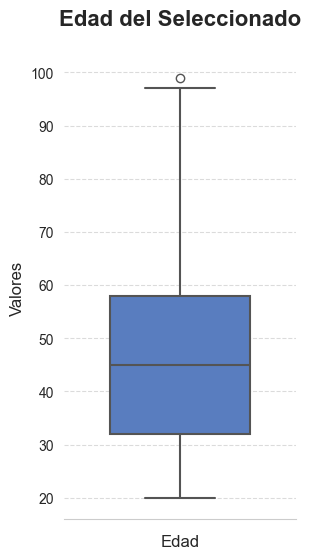

In [28]:
box_plot('edad')

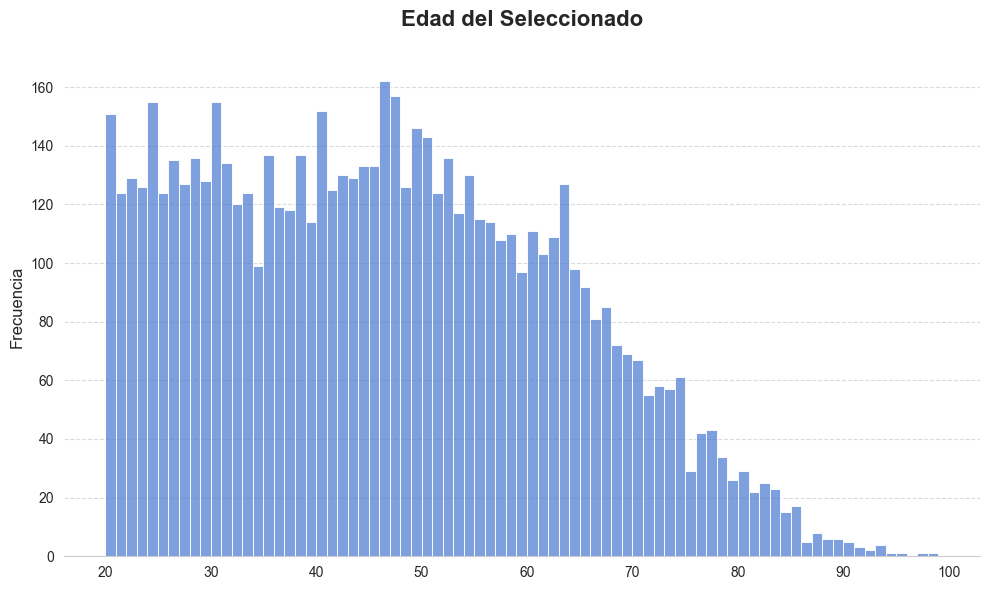

In [29]:
histograma('edad')

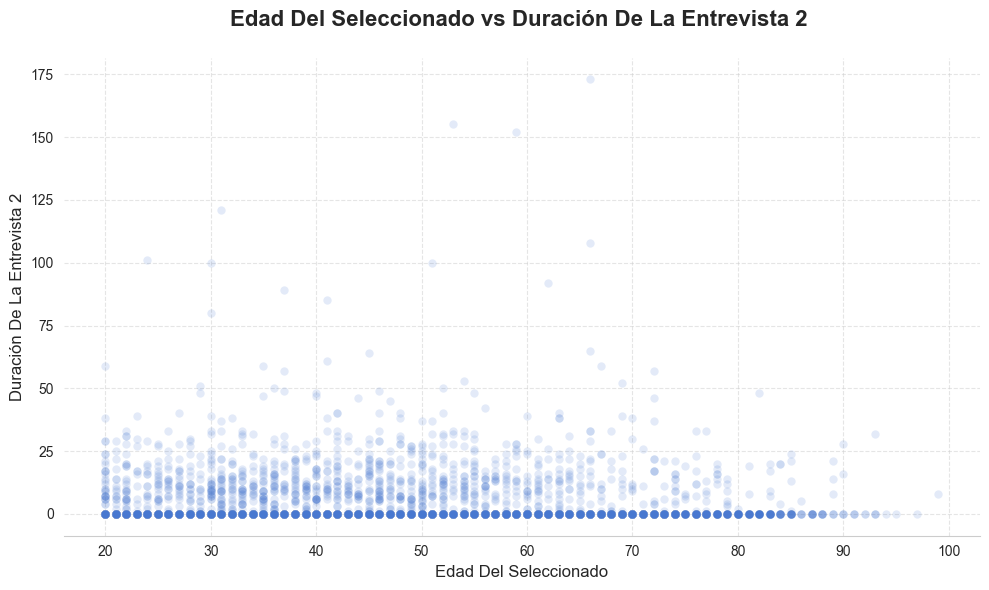

In [30]:
scatter_plot('edad', 'tiempo2')

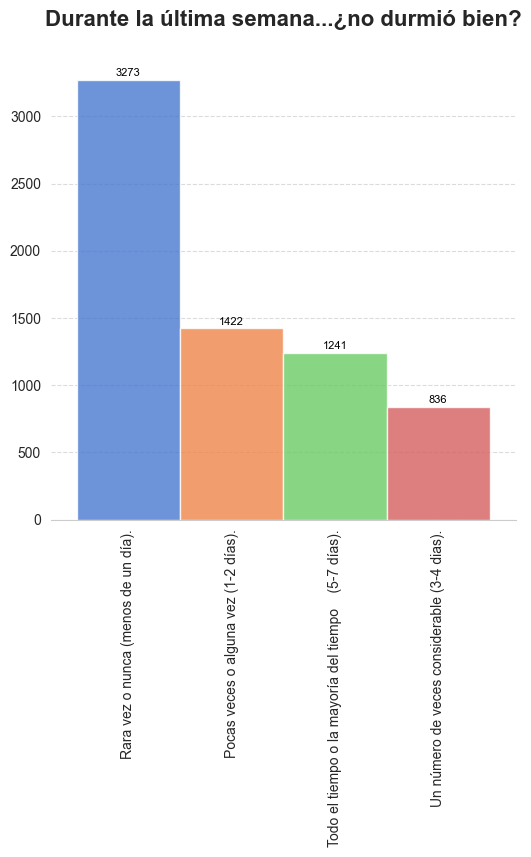

In [31]:
grafico_de_barras('a0215')

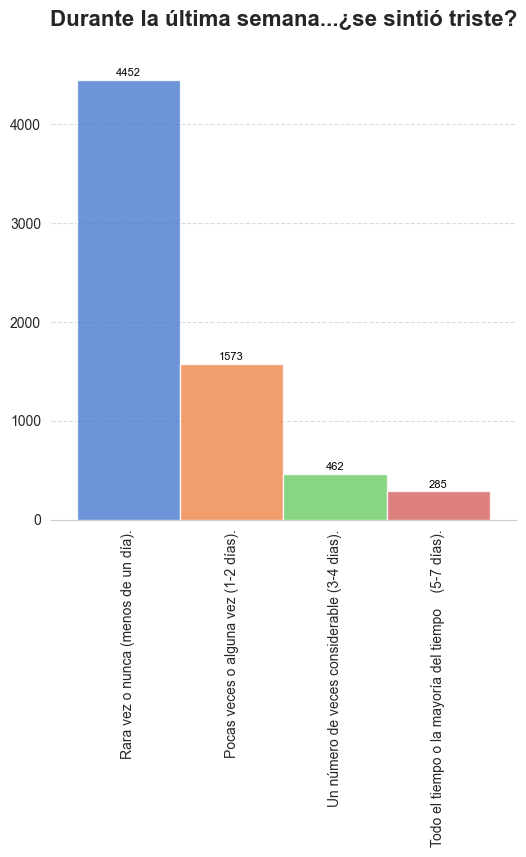

In [32]:
grafico_de_barras('a0217')

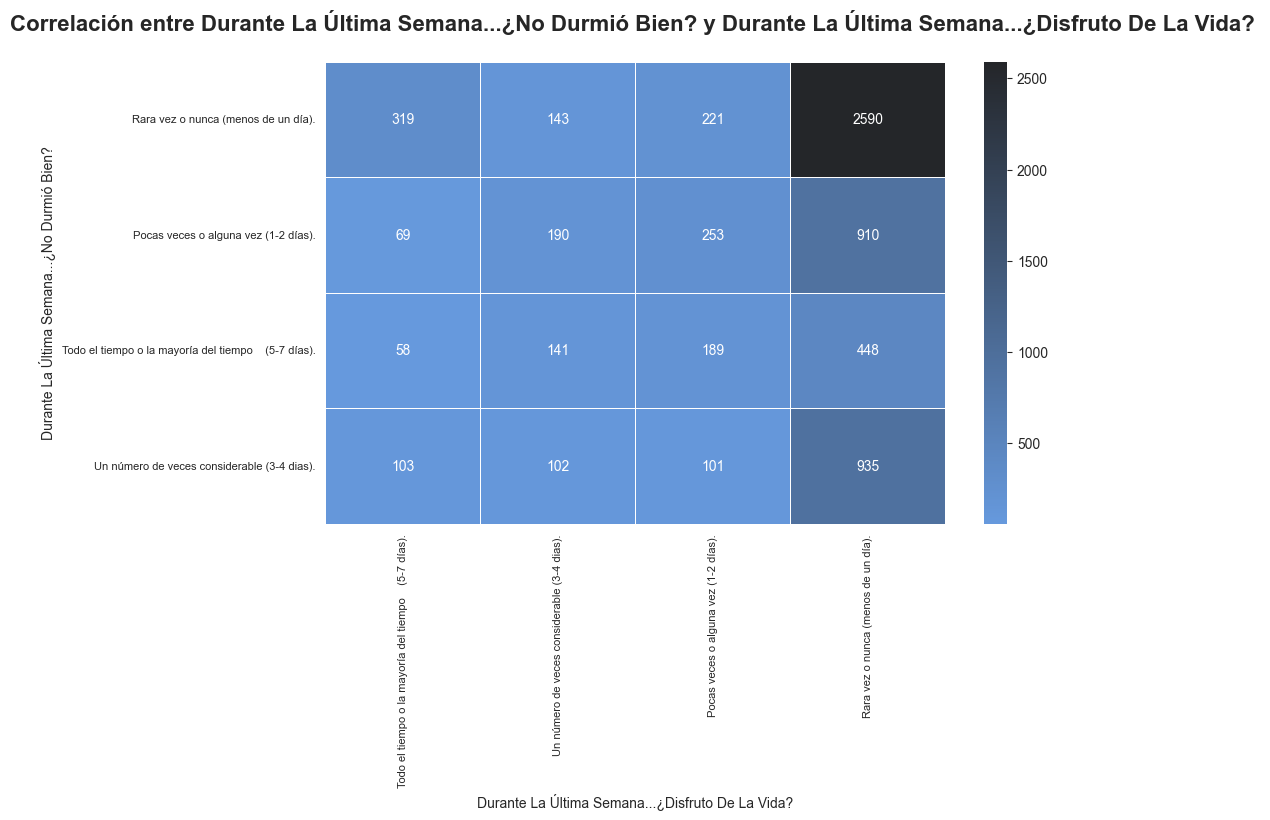

In [33]:
heatmap('a0215', 'a0216')

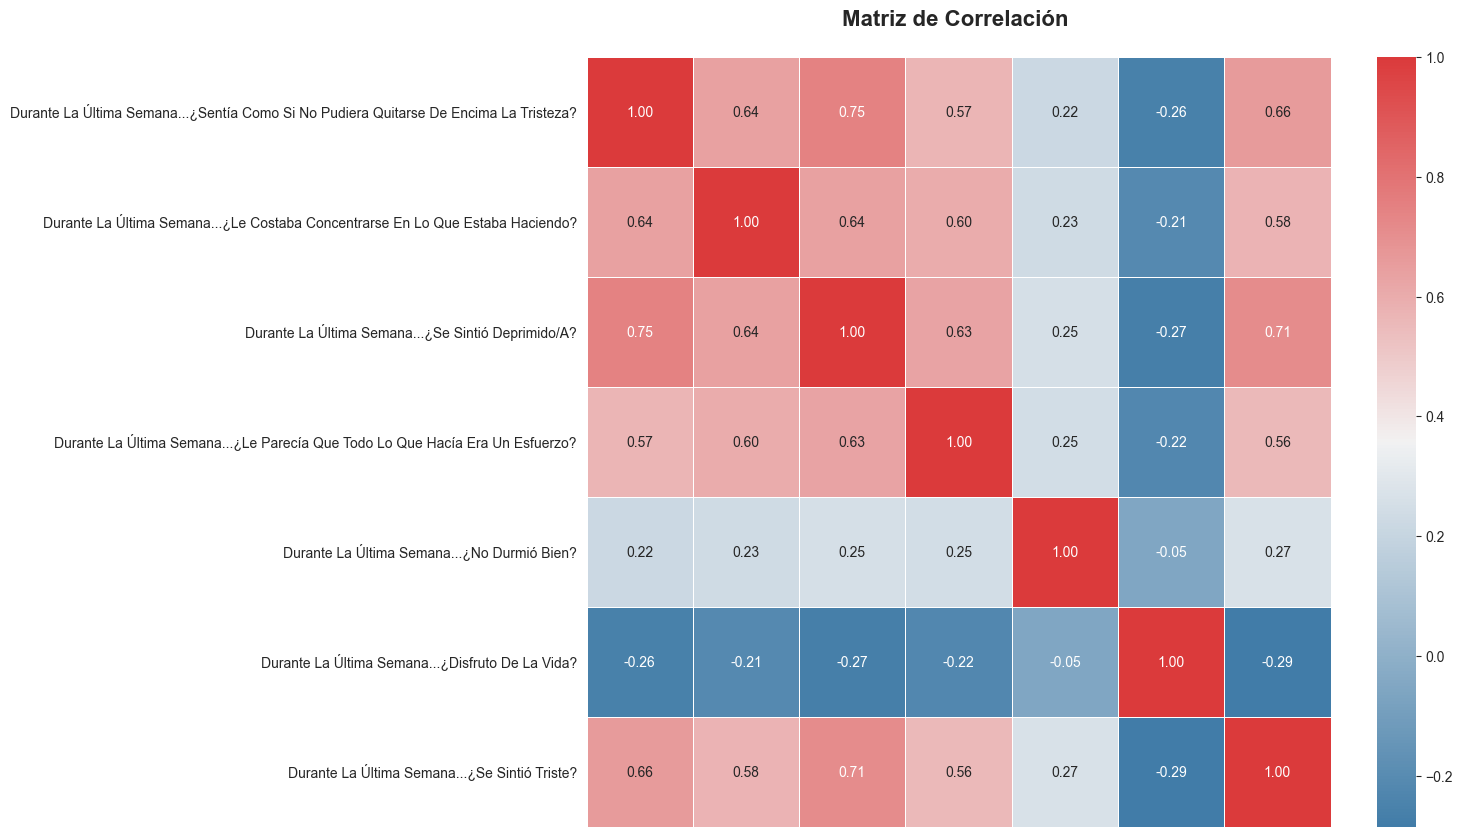

In [34]:
matriz_correlacion(['a0211', 'a0212', 'a0213', 'a0214', 'a0215', 'a0216', 'a0217'])

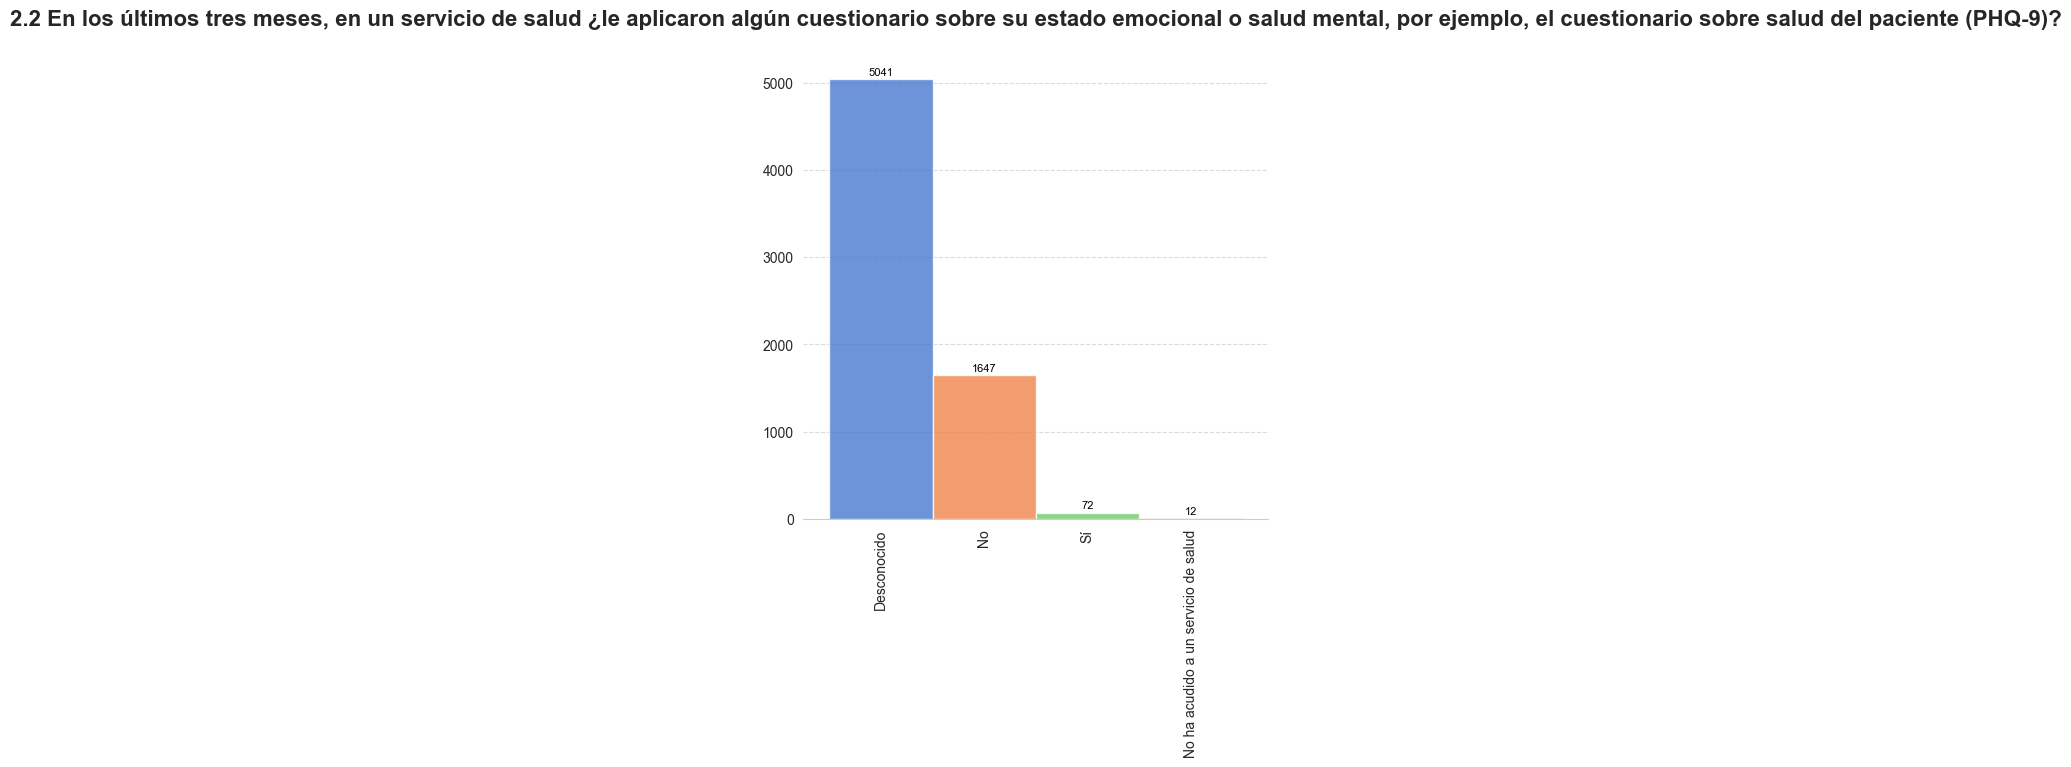

In [35]:
grafico_de_barras('a0202', plotdesconocido=True)

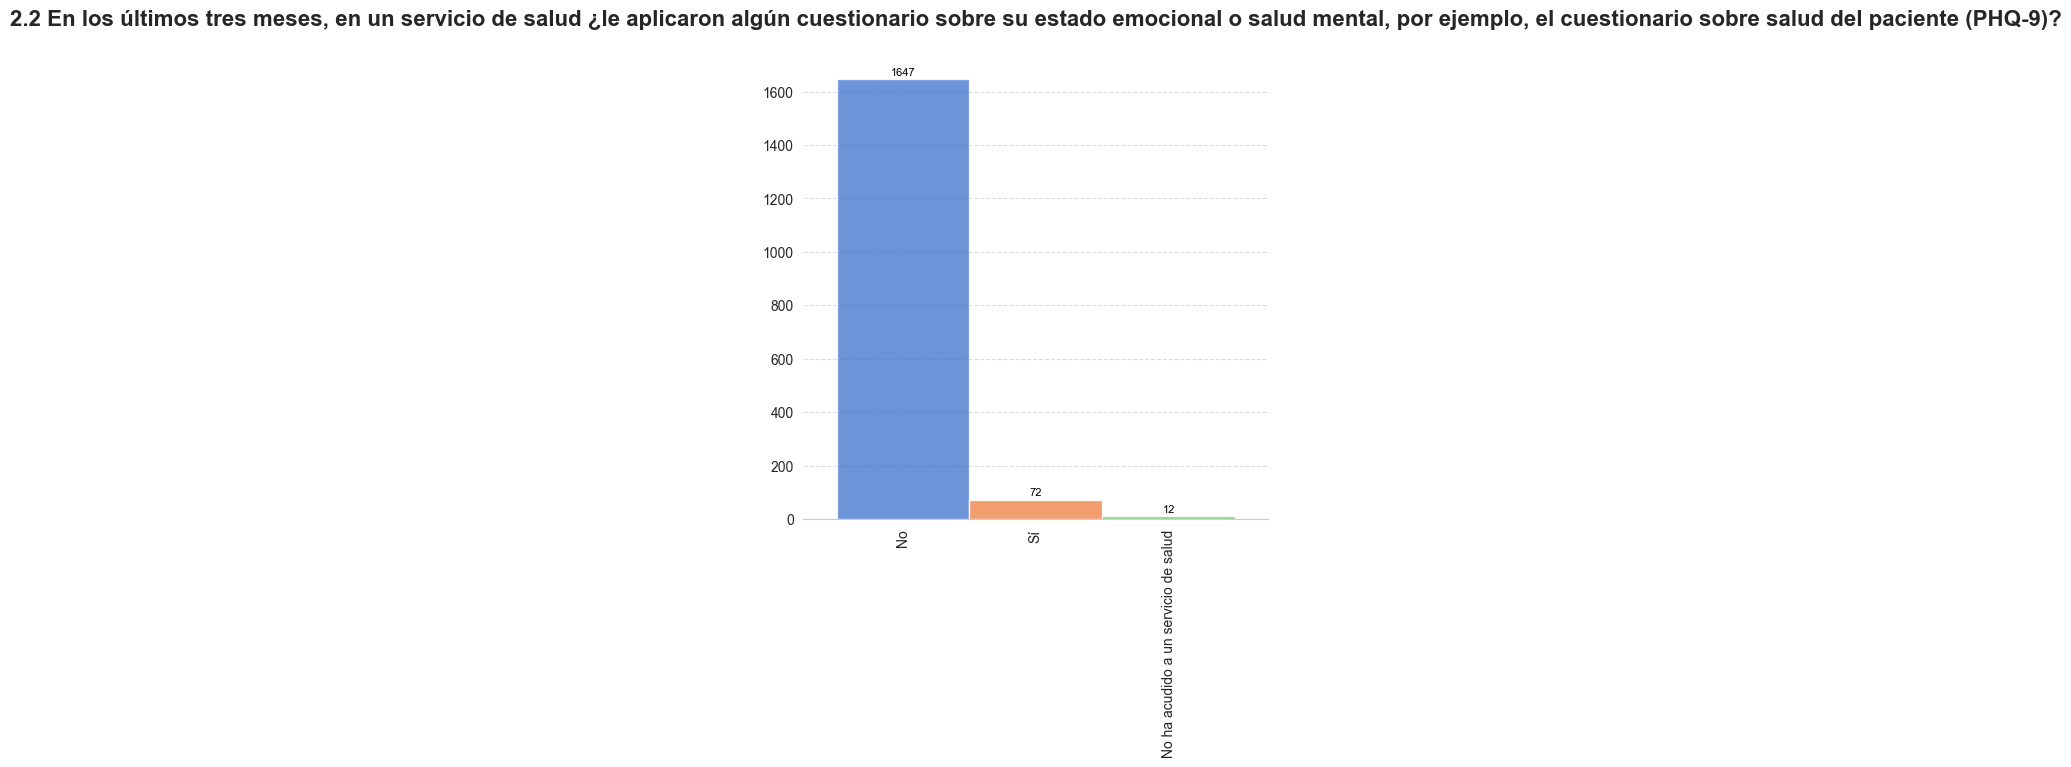

In [36]:
grafico_de_barras('a0202')

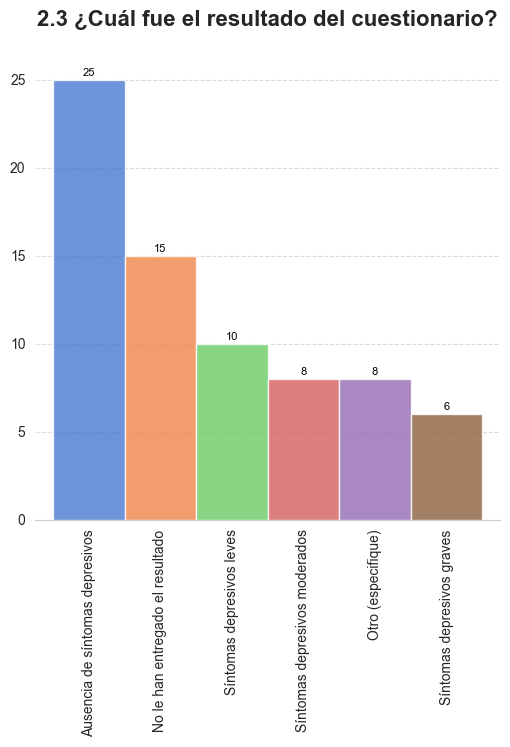

In [37]:
grafico_de_barras('a0203')

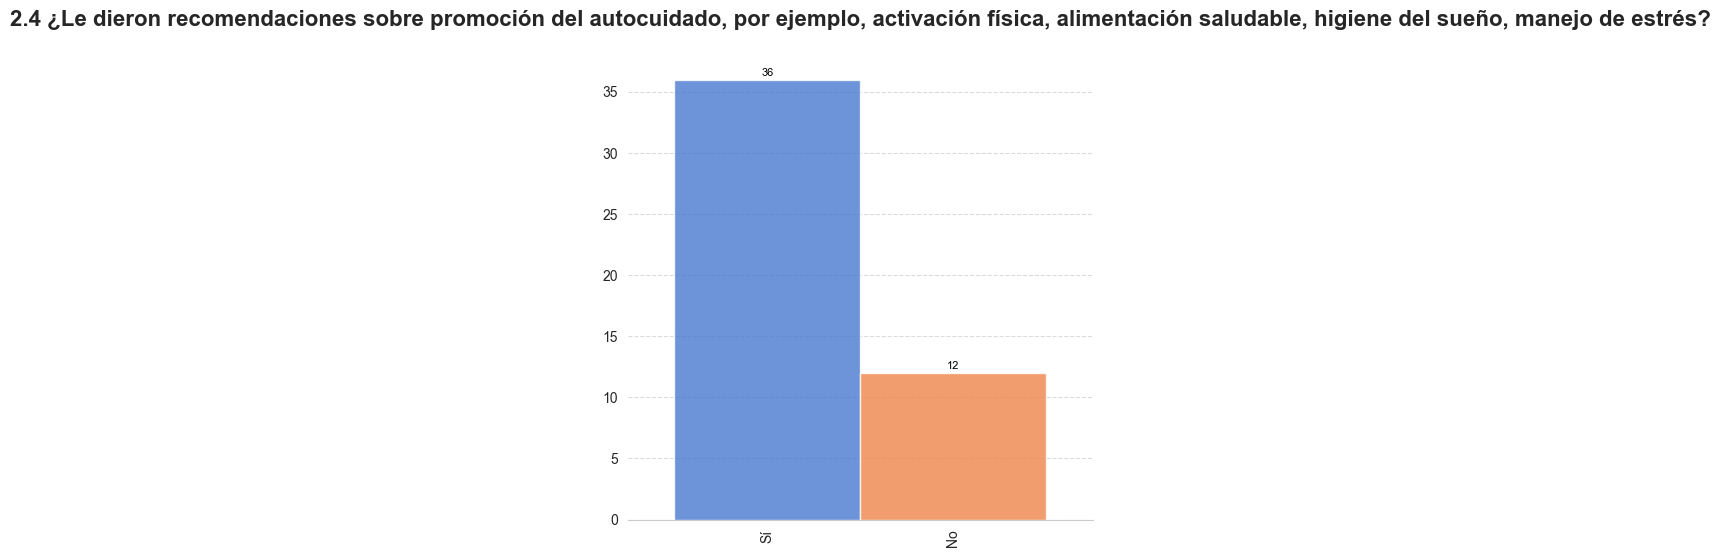

In [38]:
grafico_de_barras('a0204')

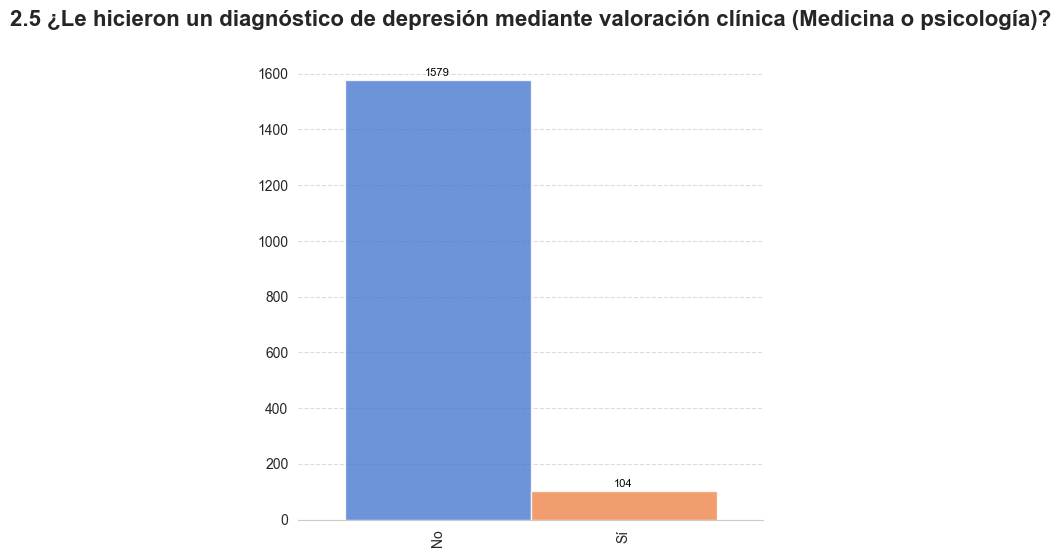

In [39]:
grafico_de_barras('a0205')

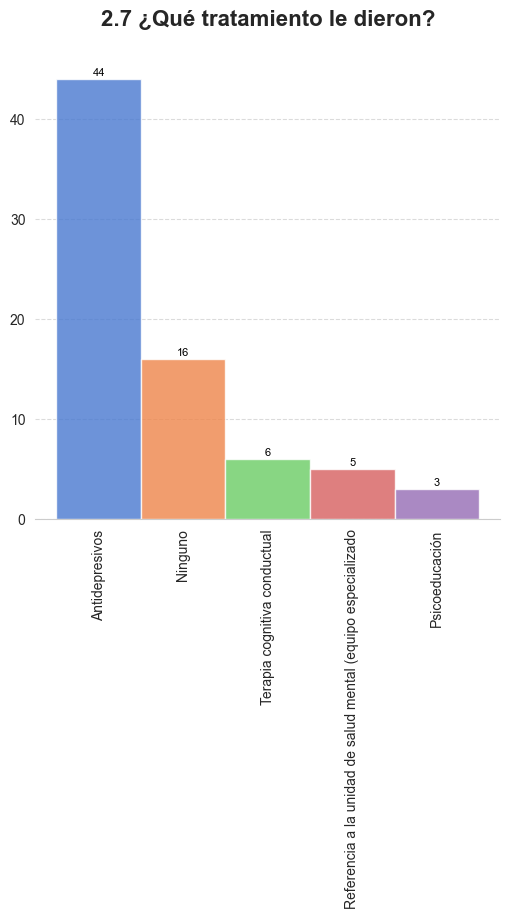

In [40]:
grafico_de_barras('a0207')